In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

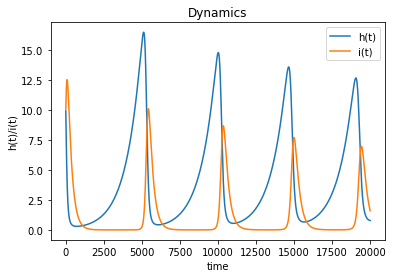

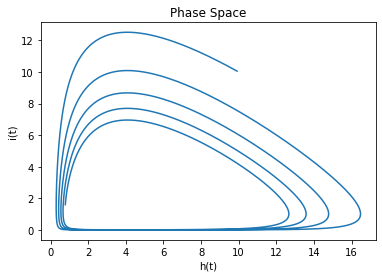

In [8]:
a = 1.0
b = 1.0
c = 1.0
d = 5.0
e = 0.1

def funh(hh,ii):
    return a*hh - b*hh*ii + e*ii
def funi(hh,ii):
    return b*hh*ii + c*ii - d*ii - e*ii

h0 = 10.0 
i0 = 10.0 
t0 = 0.0
dt = 0.001
tmax = 20000
datah = []
datai = []

for i in range(tmax):
    t = t0 + dt
    h = h0 + funh(h0,i0)*dt
    i = i0 + funi(h0,i0)*dt
    t0 = t
    h0 = h
    i0 = i
    datah.append(h0)
    datai.append(i0)
    
data = np.zeros([tmax,2])
data[:,0] = datah
data[:,1] = datai

#Plot for dynamics
plt.plot(datah, label = 'h(t)')
plt.plot(datai, label = 'i(t)')
plt.title('Dynamics')
plt.xlabel('time')
plt.ylabel('h(t)/i(t)')
plt.legend()
plt.show()

#Plot for phase space
plt.plot(datah, datai)
plt.title('Phase Space')
plt.xlabel('h(t)')
plt.ylabel('i(t)')
plt.show()

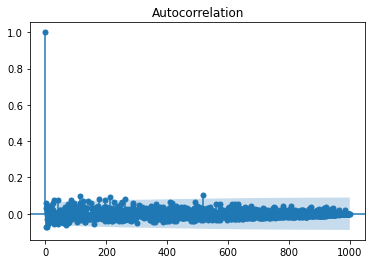

In [9]:
#Upload the data
x = pd.read_csv('Data.csv', header = None).to_numpy()
x.shape = (1000,)

#Autocorrelation
Q = sm.tsa.acf(x, nlags = 1000, fft = False)

#Make the table of data & autocorrelation
data = {'x(t)' : x,
        'Q(t)' : Q}
df = pd.DataFrame(data, columns = ['x(t)', 'Q(t)'])

#Plot the autocorrelation
fig = tsaplots.plot_acf(x, lags = 999)
plt.show()